In [4]:
import sys
sys.path.append(r'C:\Users\I6240624\Documents\BISS\Master Thesis\Code\DarianOthmanMasterThesis\Functions')
import Influencer_Characteristics as ic
import File_Opening as fo

In [5]:
dfins_en = fo.read_data(r'C:\Users\I6240624\Documents\BISS\Master Thesis\Data\icwsm_dutch_data\Ins_lingua_en_disclosed_ad.csv')
dfins_en=dfins_en[['caption']]
dfins_nl = fo.read_data(r'C:\Users\I6240624\Documents\BISS\Master Thesis\Data\icwsm_dutch_data\Ins_lingua_nl_disclosed_ad.csv')
dfins_nl=dfins_nl[['caption']]
dftt_en = fo.read_data(r'C:\Users\I6240624\Documents\BISS\Master Thesis\Data\icwsm_dutch_data\TikTok_lingua_en_disclosed_ad.csv')
dftt_en=dftt_en[['video_description']]
dftt_nl = fo.read_data(r'C:\Users\I6240624\Documents\BISS\Master Thesis\Data\icwsm_dutch_data\TikTok_lingua_nl_disclosed_ad.csv')
dftt_nl=dftt_nl[['video_description']]
dfyt_en = fo.read_data(r'C:\Users\I6240624\Documents\BISS\Master Thesis\Data\icwsm_dutch_data\Youtube_lingua_en_disclosed_ad.csv')
dfyt_en=dfyt_en[['description_video']]
dfyt_nl = fo.read_data(r'C:\Users\I6240624\Documents\BISS\Master Thesis\Data\icwsm_dutch_data\Youtube_lingua_nl_disclosed_ad.csv')
dfyt_nl=dfyt_nl[['description_video']]

In [6]:
# Open the data
yten= fo.read_data_ai('C:/Users/I6240624/Documents/BISS/Master Thesis/Code/DarianOthmanMasterThesis/yt_en_datagen_500.csv')
ytnl= fo.read_data_ai('C:/Users/I6240624/Documents/BISS/Master Thesis/Code/DarianOthmanMasterThesis/yt_nl_datagen_500.csv')
insen= fo.read_data_ai('C:/Users/I6240624/Documents/BISS/Master Thesis/Code/DarianOthmanMasterThesis/ins_en_datagen_500.csv')
insnl= fo.read_data_ai('C:/Users/I6240624/Documents/BISS/Master Thesis/Code/DarianOthmanMasterThesis/ins_nl_datagen_500.csv')
tten= fo.read_data_ai('C:/Users/I6240624/Documents/BISS/Master Thesis/Code/DarianOthmanMasterThesis/tt_en_datagen_500.csv')
ttnl= fo.read_data_ai('C:/Users/I6240624/Documents/BISS/Master Thesis/Code/DarianOthmanMasterThesis/tt_nl_datagen_500.csv')

In [7]:
# Applying the functions to the first column of the 'tten' dataset
tten['mentions'] = tten[0].apply(lambda x: ic.extract_mentions(x))
tten['urls'] = tten[0].apply(lambda x: ic.extract_urls(x))
tten['hashtags'] = tten[0].apply(lambda x: ic.extract_hashtags(x))
tten['emojis'] = tten[0].apply(lambda x: ic.extract_emojis(x))


ttnl['mentions'] = ttnl[0].apply(lambda x: ic.extract_mentions(x))
ttnl['urls'] = ttnl[0].apply(lambda x: ic.extract_urls(x))
ttnl['hashtags'] = ttnl[0].apply(lambda x: ic.extract_hashtags(x))
ttnl['emojis'] = ttnl[0].apply(lambda x: ic.extract_emojis(x))

insen['mentions'] = insen[0].apply(lambda x: ic.extract_mentions(x))
insen['urls'] = insen[0].apply(lambda x: ic.extract_urls(x))
insen['hashtags'] = insen[0].apply(lambda x: ic.extract_hashtags(x))
insen['emojis'] = insen[0].apply(lambda x: ic.extract_emojis(x))

insnl['mentions'] = insnl[0].apply(lambda x: ic.extract_mentions(x))
insnl['urls'] = insnl[0].apply(lambda x: ic.extract_urls(x))
insnl['hashtags'] = insnl[0].apply(lambda x: ic.extract_hashtags(x))
insnl['emojis'] = insnl[0].apply(lambda x: ic.extract_emojis(x))

yten['mentions'] = yten[0].apply(lambda x: ic.extract_mentions(x))
yten['urls'] = yten[0].apply(lambda x: ic.extract_urls(x))
yten['hashtags'] = yten[0].apply(lambda x: ic.extract_hashtags(x))
yten['emojis'] = yten[0].apply(lambda x: ic.extract_emojis(x))

ytnl['mentions'] = ytnl[0].apply(lambda x: ic.extract_mentions(x))
ytnl['urls'] = ytnl[0].apply(lambda x: ic.extract_urls(x))
ytnl['hashtags'] = ytnl[0].apply(lambda x: ic.extract_hashtags(x))
ytnl['emojis'] = ytnl[0].apply(lambda x: ic.extract_emojis(x))

In [8]:
columns_to_split = ['mentions', 'hashtags', 'urls', 'emojis']
tten=ic.split_columns(tten, columns_to_split)
ttnl=ic.split_columns(ttnl, columns_to_split)
yten=ic.split_columns(yten, columns_to_split)
ytnl=ic.split_columns(ytnl, columns_to_split)
insen=ic.split_columns(insen, columns_to_split)
insnl=ic.split_columns(insnl, columns_to_split)

In [9]:
dfins_en['mentions'] = dfins_en["caption"].apply(lambda x: ic.extract_mentions(x))
dfins_en['urls'] = dfins_en["caption"].apply(lambda x: ic.extract_urls(x))
dfins_en['hashtags'] = dfins_en["caption"].apply(lambda x: ic.extract_hashtags(x))
dfins_en['emojis'] = dfins_en["caption"].apply(lambda x: ic.extract_emojis(x))

dfins_nl['mentions'] = dfins_nl["caption"].apply(lambda x: ic.extract_mentions(x))
dfins_nl['urls'] = dfins_nl["caption"].apply(lambda x: ic.extract_urls(x))
dfins_nl['hashtags'] = dfins_nl["caption"].apply(lambda x: ic.extract_hashtags(x))
dfins_nl['emojis'] = dfins_nl["caption"].apply(lambda x: ic.extract_emojis(x))

dftt_en['mentions'] = dftt_en["video_description"].apply(lambda x: ic.extract_mentions(x))
dftt_en['urls'] = dftt_en["video_description"].apply(lambda x: ic.extract_urls(x))
dftt_en['hashtags'] = dftt_en["video_description"].apply(lambda x: ic.extract_hashtags(x))
dftt_en['emojis'] = dftt_en["video_description"].apply(lambda x: ic.extract_emojis(x))

dftt_nl['mentions'] = dftt_nl["video_description"].apply(lambda x: ic.extract_mentions(x))
dftt_nl['urls'] = dftt_nl["video_description"].apply(lambda x: ic.extract_urls(x))
dftt_nl['hashtags'] = dftt_nl["video_description"].apply(lambda x: ic.extract_hashtags(x))
dftt_nl['emojis'] = dftt_nl["video_description"].apply(lambda x: ic.extract_emojis(x))

dfyt_en['mentions'] = dfyt_en["description_video"].apply(lambda x: ic.extract_mentions(x))
dfyt_en['urls'] = dfyt_en["description_video"].apply(lambda x: ic.extract_urls(x))
dfyt_en['hashtags'] = dfyt_en["description_video"].apply(lambda x: ic.extract_hashtags(x))
dfyt_en['emojis'] = dfyt_en["description_video"].apply(lambda x: ic.extract_emojis(x))

dfyt_nl['mentions'] = dfyt_nl["description_video"].apply(lambda x: ic.extract_mentions(x))
dfyt_nl['urls'] = dfyt_nl["description_video"].apply(lambda x: ic.extract_urls(x))
dfyt_nl['hashtags'] = dfyt_nl["description_video"].apply(lambda x: ic.extract_hashtags(x))
dfyt_nl['emojis'] = dfyt_nl["description_video"].apply(lambda x: ic.extract_emojis(x))

In [10]:
columns_to_split = ['mentions', 'hashtags', 'urls', 'emojis']
dfins_en=ic.split_columns(dfins_en, columns_to_split)
dfins_nl=ic.split_columns(dfins_nl, columns_to_split)
dftt_en=ic.split_columns(dftt_en, columns_to_split)
dftt_nl=ic.split_columns(dftt_nl, columns_to_split)
dfyt_en=ic.split_columns(dfyt_en, columns_to_split)
dfyt_nl=ic.split_columns(dfyt_nl, columns_to_split)

In [11]:
dfyt_en=dfyt_en.rename(columns={'description_video': 'caption'})
dfyt_nl = dfyt_nl.rename(columns={'description_video': 'caption'})
dftt_en=dftt_en.rename(columns={'video_description': 'caption'})
dftt_nl = dftt_nl.rename(columns={'video_description': 'caption'})
insen=insen.rename(columns={0: 'caption'})
insnl = insnl.rename(columns={0: 'caption'})
yten=yten.rename(columns={0: 'caption'})
ytnl = ytnl.rename(columns={0: 'caption'})
tten=tten.rename(columns={0: 'caption'})
ttnl = ttnl.rename(columns={0: 'caption'})

In [12]:
dfins_en['mentions_count'] = dfins_en['mentions'].apply(lambda x: len(x))
dfins_en['hashtags_count'] = dfins_en['hashtags'].apply(lambda x: len(x))
dfins_en['urls_count'] = dfins_en['urls'].apply(lambda x: len(x))
dfins_en['emojis_count'] = dfins_en['emojis'].apply(lambda x: len(x))
dfins_en['caption_length'] = dfins_en['caption'].apply(lambda x: len(x))

dfins_nl['mentions_count'] = dfins_nl['mentions'].apply(lambda x: len(x))
dfins_nl['hashtags_count'] = dfins_nl['hashtags'].apply(lambda x: len(x))
dfins_nl['urls_count'] = dfins_nl['urls'].apply(lambda x: len(x))
dfins_nl['emojis_count'] = dfins_nl['emojis'].apply(lambda x: len(x))
dfins_nl['caption_length'] = dfins_nl['caption'].apply(lambda x: len(x))

dftt_en['mentions_count'] = dftt_en['mentions'].apply(lambda x: len(x))
dftt_en['hashtags_count'] = dftt_en['hashtags'].apply(lambda x: len(x))
dftt_en['urls_count'] = dftt_en['urls'].apply(lambda x: len(x))
dftt_en['emojis_count'] = dftt_en['emojis'].apply(lambda x: len(x))
dftt_en['caption_length'] = dftt_en['caption'].apply(lambda x: len(x))

dftt_nl['mentions_count'] = dftt_nl['mentions'].apply(lambda x: len(x))
dftt_nl['hashtags_count'] = dftt_nl['hashtags'].apply(lambda x: len(x))
dftt_nl['urls_count'] = dftt_nl['urls'].apply(lambda x: len(x))
dftt_nl['emojis_count'] = dftt_nl['emojis'].apply(lambda x: len(x))
dftt_nl['caption_length'] = dftt_nl['caption'].apply(lambda x: len(x))

dfyt_en['mentions_count'] = dfyt_en['mentions'].apply(lambda x: len(x))
dfyt_en['hashtags_count'] = dfyt_en['hashtags'].apply(lambda x: len(x))
dfyt_en['urls_count'] = dfyt_en['urls'].apply(lambda x: len(x))
dfyt_en['emojis_count'] = dfyt_en['emojis'].apply(lambda x: len(x))
dfyt_en['caption_length'] = dfyt_en['caption'].apply(lambda x: len(x))

dfyt_nl['mentions_count'] = dfyt_nl['mentions'].apply(lambda x: len(x))
dfyt_nl['hashtags_count'] = dfyt_nl['hashtags'].apply(lambda x: len(x))
dfyt_nl['urls_count'] = dfyt_nl['urls'].apply(lambda x: len(x))
dfyt_nl['emojis_count'] = dfyt_nl['emojis'].apply(lambda x: len(x))
dfyt_nl['caption_length'] = dfyt_nl['caption'].apply(lambda x: len(x))

tten['mentions_count'] = tten['mentions'].apply(lambda x: len(x))
tten['hashtags_count'] = tten['hashtags'].apply(lambda x: len(x))
tten['urls_count'] = tten['urls'].apply(lambda x: len(x))
tten['emojis_count'] = tten['emojis'].apply(lambda x: len(x))
tten['caption_length'] = tten['caption'].apply(lambda x: len(x))

ttnl['mentions_count'] = ttnl['mentions'].apply(lambda x: len(x))
ttnl['hashtags_count'] = ttnl['hashtags'].apply(lambda x: len(x))
ttnl['urls_count'] = ttnl['urls'].apply(lambda x: len(x))
ttnl['emojis_count'] = ttnl['emojis'].apply(lambda x: len(x))
ttnl['caption_length'] = ttnl['caption'].apply(lambda x: len(x))

yten['mentions_count'] = yten['mentions'].apply(lambda x: len(x))
yten['hashtags_count'] = yten['hashtags'].apply(lambda x: len(x))
yten['urls_count'] = yten['urls'].apply(lambda x: len(x))
yten['emojis_count'] = yten['emojis'].apply(lambda x: len(x))
yten['caption_length'] = yten['caption'].apply(lambda x: len(x))

ytnl['mentions_count'] = ytnl['mentions'].apply(lambda x: len(x))
ytnl['hashtags_count'] = ytnl['hashtags'].apply(lambda x: len(x))
ytnl['urls_count'] = ytnl['urls'].apply(lambda x: len(x))
ytnl['emojis_count'] = ytnl['emojis'].apply(lambda x: len(x))
ytnl['caption_length'] = ytnl['caption'].apply(lambda x: len(x))

insen['mentions_count'] = insen['mentions'].apply(lambda x: len(x))
insen['hashtags_count'] = insen['hashtags'].apply(lambda x: len(x))
insen['urls_count'] = insen['urls'].apply(lambda x: len(x))
insen['emojis_count'] = insen['emojis'].apply(lambda x: len(x))
insen['caption_length'] = insen['caption'].apply(lambda x: len(x))

insnl['mentions_count'] = insnl['mentions'].apply(lambda x: len(x))
insnl['hashtags_count'] = insnl['hashtags'].apply(lambda x: len(x))
insnl['urls_count'] = insnl['urls'].apply(lambda x: len(x))
insnl['emojis_count'] = insnl['emojis'].apply(lambda x: len(x))
insnl['caption_length'] = insnl['caption'].apply(lambda x: len(x))

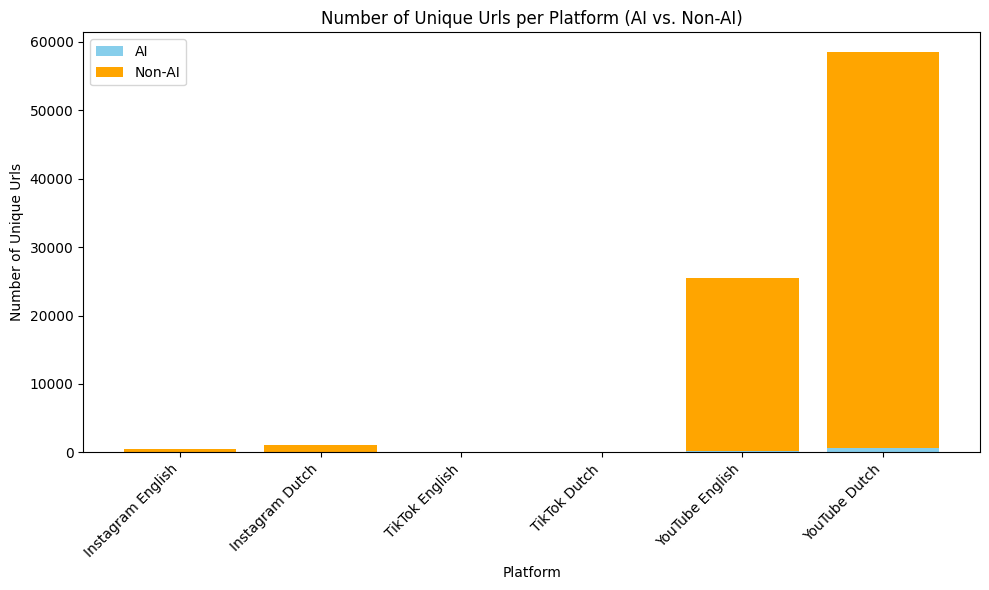

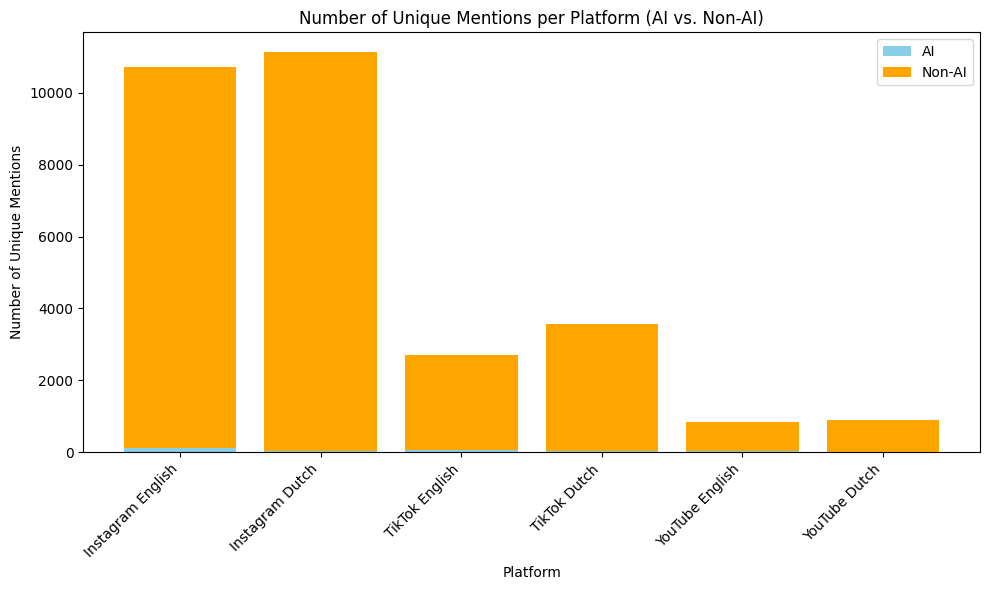

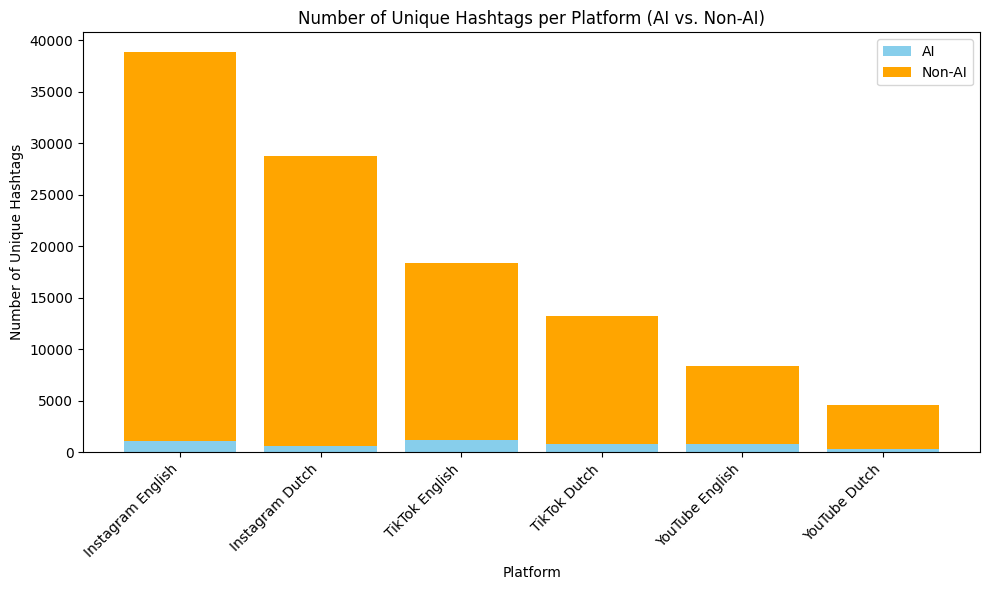

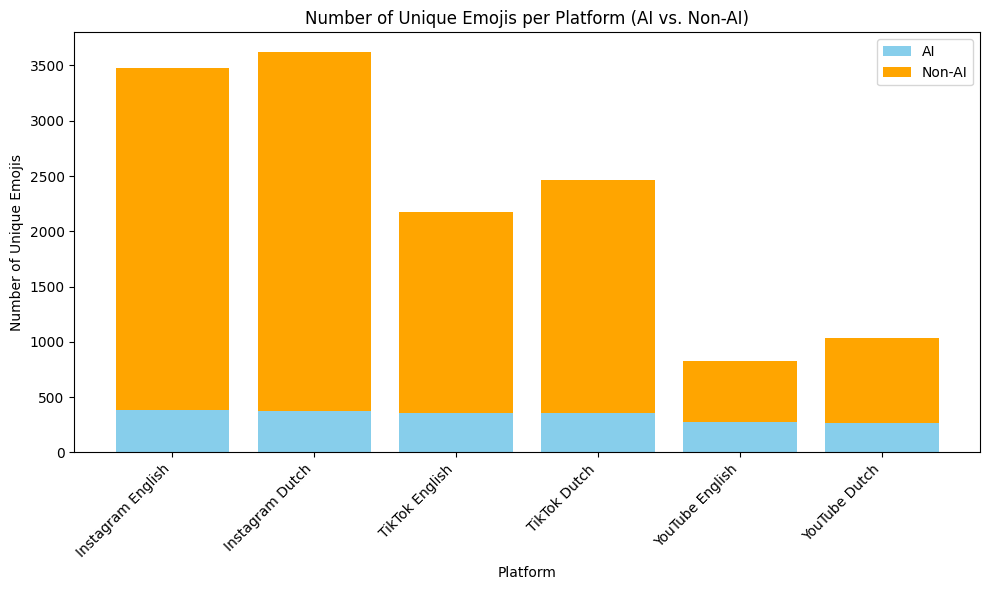

In [17]:
# Plot the unique values
ic.plot_unique(insen,insnl,tten,ttnl,yten,ytnl,dfins_en,dfins_nl,dftt_en,dftt_nl,dfyt_en,dfyt_nl,"urls")
ic.plot_unique(insen,insnl,tten,ttnl,yten,ytnl,dfins_en,dfins_nl,dftt_en,dftt_nl,dfyt_en,dfyt_nl,"mentions")
ic.plot_unique(insen,insnl,tten,ttnl,yten,ytnl,dfins_en,dfins_nl,dftt_en,dftt_nl,dfyt_en,dfyt_nl,"hashtags")
ic.plot_unique(insen,insnl,tten,ttnl,yten,ytnl,dfins_en,dfins_nl,dftt_en,dftt_nl,dfyt_en,dfyt_nl,"emojis")

In [20]:
# Save the data
dfins_en.to_csv(r'C:\Users\I6240624\Documents\BISS\Master Thesis\Data\dfinsenchar.csv', index=False)
dfins_nl.to_csv(r'C:\Users\I6240624\Documents\BISS\Master Thesis\Data\dfinsnlchar.csv', index=False)
dftt_en.to_csv(r'C:\Users\I6240624\Documents\BISS\Master Thesis\Data\dfttenchar.csv', index=False)
dftt_nl.to_csv(r'C:\Users\I6240624\Documents\BISS\Master Thesis\Data\dfttnlchar.csv', index=False)
dfyt_en.to_csv(r'C:\Users\I6240624\Documents\BISS\Master Thesis\Data\dfytenchar.csv', index=False)
dfyt_nl.to_csv(r'C:\Users\I6240624\Documents\BISS\Master Thesis\Data\dfytnlchar.csv', index=False)
tten.to_csv(r'C:\Users\I6240624\Documents\BISS\Master Thesis\Data\ttenchar.csv', index=False)
ttnl.to_csv(r'C:\Users\I6240624\Documents\BISS\Master Thesis\Data\ttnlchar.csv', index=False)
yten.to_csv(r'C:\Users\I6240624\Documents\BISS\Master Thesis\Data\ytenchar.csv', index=False)
ytnl.to_csv(r'C:\Users\I6240624\Documents\BISS\Master Thesis\Data\ytnlchar.csv', index=False)
insen.to_csv(r'C:\Users\I6240624\Documents\BISS\Master Thesis\Data\insenchar.csv', index=False)
insnl.to_csv(r'C:\Users\I6240624\Documents\BISS\Master Thesis\Data\insnlchar.csv', index=False)